<h1>VGG Model</h1>
<p>The file is the VGG model we use. The training dataset is 'train.csv', without 'extra.csv'. In this case, we only run the epoch =  15, 
but we could make the epoch larger to get a higher accuracy. </p>
<p>In the submisstion in Kaggle, the epoch is 25.</p>

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from utils import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

Using TensorFlow backend.


In [2]:
batch_size = 40
num_classes = 10
epochs = 15
data_augmentation = False

In [3]:
def to_categorical(y, num_classes=None):
    """Converts a class vector (integers) to binary class matrix.
    E.g. for use with categorical_crossentropy.
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
    # Returns
        A binary matrix representation of the input.
    """
    y = np.array(y, dtype='int').ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes))
    categorical[np.arange(n), y] = 1
    return categorical

In [4]:
mat_train = loadmat("data/train_32x32.mat")
mat_train['X'] = mat_train['X'].transpose(3, 0, 1, 2)
X_train = mat_train['X']
X_train = 1.0 * X_train/255  # This line is vital for training!
y_train = mat_train['y'].reshape(-1, )
y_train[y_train == 10] = 0 

mat_test = loadmat('data/test_32x32.mat')
mat_test['X'] = mat_test['X'].transpose(3, 0, 1, 2)
X_test = mat_test['X']
X_test = 1.0*X_test/255

X_train_final=X_train[:,2:30,2:30,:]
X_test_final=X_test[:,2:30,2:30,:]

X_train, X_val, y_train, y_val = train_test_split(X_train_final, y_train, test_size=0.3, random_state=0)


In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [6]:
y_train_final = to_categorical(y_train, num_classes)
y_val_final = to_categorical(y_val, num_classes)

In [10]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(X_train, y_train_final,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_val, y_val_final),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)

    # Fit the model on the batches generated by datagen.flow().
    history=model.fit_generator(datagen.flow(X_train, y_train_final,
                                     batch_size=batch_size),
                        steps_per_epoch=X_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(X_val, y_val_final))

Not using data augmentation.
Train on 51279 samples, validate on 21978 samples
Epoch 1/15
51279/51279 [==============================] - 1230s - loss: 0.9181 - acc: 0.7406 - val_loss: 0.6649 - val_acc: 0.8212
Epoch 2/15
51279/51279 [==============================] - 810s - loss: 0.5315 - acc: 0.8509 - val_loss: 0.3912 - val_acc: 0.8884
Epoch 3/15
51279/51279 [==============================] - 806s - loss: 0.4403 - acc: 0.8753 - val_loss: 0.3667 - val_acc: 0.8956
Epoch 4/15
51279/51279 [==============================] - 804s - loss: 0.3821 - acc: 0.8900 - val_loss: 0.3484 - val_acc: 0.8962
Epoch 5/15
51279/51279 [==============================] - 802s - loss: 0.3425 - acc: 0.9014 - val_loss: 0.2698 - val_acc: 0.9236
Epoch 6/15
51279/51279 [==============================] - 802s - loss: 0.3154 - acc: 0.9089 - val_loss: 0.3662 - val_acc: 0.8945
Epoch 7/15
51279/51279 [==============================] - 800s - loss: 0.2918 - acc: 0.9155 - val_loss: 0.3095 - val_acc: 0.9091
Epoch 8/15
51279/

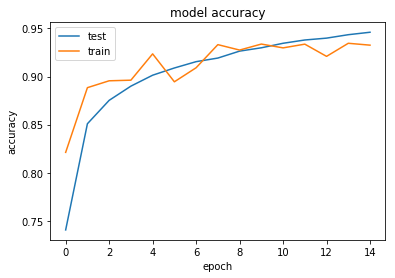

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

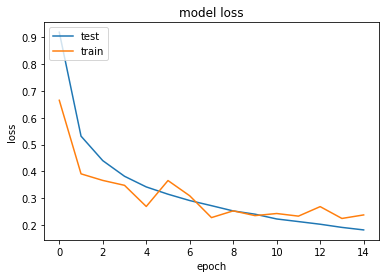

In [12]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

In [12]:
y_test_final=np.argmax(model.predict(X_test_final),axis=1)

In [13]:
y_test=np.where(y_test_final>0,y_test_final,10)

In [14]:
import csv
with open("output.csv","w",newline="") as datacsv:
    csvwriter = csv.writer(datacsv,dialect = ("excel"))
    csvwriter.writerow(['ImageId', 'label'])
    for i in range(len(y_test)):
        csvwriter.writerow((i, y_test[i]))